In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
df = pd.read_csv("exp_wk_44_48.csv")

In [57]:
df = df.fillna(0)
df.head()

,city3,wk,car_numb,total_ob,incentive_without_penalty,city_login
0,hyderabad,47,TS01UA2411,719.91,0.00,10.768889
1,hyderabad,44,TS01UA6452,14326.65,859.71,79.105000
2,hyderabad,48,TS01UB4891,5876.15,474.01,36.320000
3,hyderabad,45,TS01UB6795,16216.37,240.41,70.632222
4,hyderabad,44,TS02UA9216,7539.89,1390.45,41.667500


In [58]:
df = df.drop("city3",axis=1)
df["eph"] = (df["total_ob"]+df["incentive_without_penalty"])/df["city_login"]

In [59]:
df.loc[df.eph == float('inf'), 'eph'] = 0

In [60]:
wk44 = df[df.wk == 44]
wk45 = df[df.wk == 45]
wk46 = df[df.wk == 46]
wk47 = df[df.wk == 47]
wk48 = df[df.wk == 48]

In [61]:
wk44 = wk44.sort_values(by=['car_numb'],ascending=[True])
wk45 = wk45.sort_values(by=['car_numb'],ascending=[True])
wk46 = wk46.sort_values(by=['car_numb'],ascending=[True])
wk47 = wk47.sort_values(by=['car_numb'],ascending=[True])
wk48 = wk48.sort_values(by=['car_numb'],ascending=[True])

In [62]:
l = []
for i in range(1,1515):
    l.append(i)
wk44["index"] = l
wk45["index"] = l
wk46["index"] = l
wk47["index"] = l
wk48["index"] = l

In [63]:
wk44.set_index("index",inplace=True)
wk45.set_index("index",inplace=True)
wk46.set_index("index",inplace=True)
wk47.set_index("index",inplace=True)
wk48.set_index("index",inplace=True)

In [64]:
wk44["wk45login"] = wk45["city_login"]
wk45["wk46login"] = wk46["city_login"]
wk46["wk47login"] = wk47["city_login"]
wk47["wk48login"] = wk48["city_login"]

In [65]:
wk44["changep"] = ((wk44['wk45login']-wk44['city_login'])/wk44['city_login']) * 100
wk45["changep"] = ((wk45['wk46login']-wk45['city_login'])/wk45['city_login']) * 100
wk46["changep"] = ((wk46['wk47login']-wk46['city_login'])/wk46['city_login']) * 100
wk47["changep"] = ((wk47['wk48login']-wk47['city_login'])/wk47['city_login']) * 100

In [66]:
wk44.drop(["wk","wk45login"], axis=1, inplace=True)
wk45.drop(["wk","wk46login"], axis=1, inplace=True)
wk46.drop(["wk","wk47login"], axis=1, inplace=True)
wk47.drop(["wk","wk48login"], axis=1, inplace=True)

In [67]:
wk44 = wk44[wk44.city_login !=0]
wk45 = wk45[wk45.city_login !=0]
wk46 = wk46[wk46.city_login !=0]
wk47 = wk47[wk47.city_login !=0]

In [69]:
wk46.head()

,car_numb,total_ob,incentive_without_penalty,city_login,eph,changep
index,,,,,,
1,TS01UA2411,6395.70,0.00,31.358333,203.955355,-65.658606
2,TS01UA4308,4105.47,60.29,23.676944,175.941622,13.254807
3,TS01UA4945,262.63,0.00,12.003889,21.878743,5.333920
4,TS01UA6452,13535.50,1288.20,67.733611,218.852941,-32.632740
5,TS01UA7585,1943.76,334.40,42.693611,53.360677,-32.845143


In [70]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest()

In [71]:
clf.fit(wk46.drop(["car_numb","city_login","eph"],axis=1))
y = clf.predict(wk46.drop(["car_numb","city_login","eph"],axis=1))

In [72]:
wk46["outliers"] = y

In [75]:
wk46[wk46.outliers != -1].describe()

,total_ob,incentive_without_penalty,city_login,eph,changep,outliers
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.0
mean,6383.835283,745.896071,37.628126,185.978501,24.053672,1.0
std,4498.043984,1224.046789,25.030903,77.178416,95.822323,0.0
min,69.890000,-974.448000,0.380000,3.604105,-95.006593,1.0
25%,2462.380000,0.000000,16.180278,143.890440,-30.747423,1.0
50%,5458.530000,0.000000,34.381111,190.849682,-0.270921,1.0
75%,9766.860000,990.000000,55.972778,228.343391,43.776720,1.0
max,18832.400000,5495.920000,130.096111,1689.894737,565.888078,1.0


In [76]:
clf.fit(wk47.drop(["car_numb","city_login","eph"],axis=1))
y = clf.predict(wk47.drop(["car_numb","city_login","eph"],axis=1))

In [77]:
wk47["outliers"] = y
wk47[wk47.outliers != -1].describe()

,total_ob,incentive_without_penalty,city_login,eph,changep,outliers
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.0
mean,6072.499537,660.160206,36.828186,182.361165,25.878969,1.0
std,4228.218611,1009.542404,24.032090,66.816001,103.751972,0.0
min,59.200000,-500.000000,0.436389,1.983783,-95.902618,1.0
25%,2451.580000,0.000000,16.543889,138.127994,-31.142153,1.0
50%,5364.520000,46.630000,33.590556,187.136196,1.260727,1.0
75%,9153.240000,1009.590000,52.406389,226.090015,46.643891,1.0
max,17018.770000,4780.000000,141.734444,573.501378,741.759786,1.0


In [84]:
wk46_without_outliers = wk46[wk46.outliers != -1]

In [119]:
from sklearn.cluster import KMeans

In [120]:
kmeans = KMeans(n_clusters=2)

In [121]:
kmeans.fit(wk46_without_outliers.drop(["car_numb","city_login","eph","outliers"],axis=1).values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [122]:
wk46_without_outliers["category"] = kmeans.labels_

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


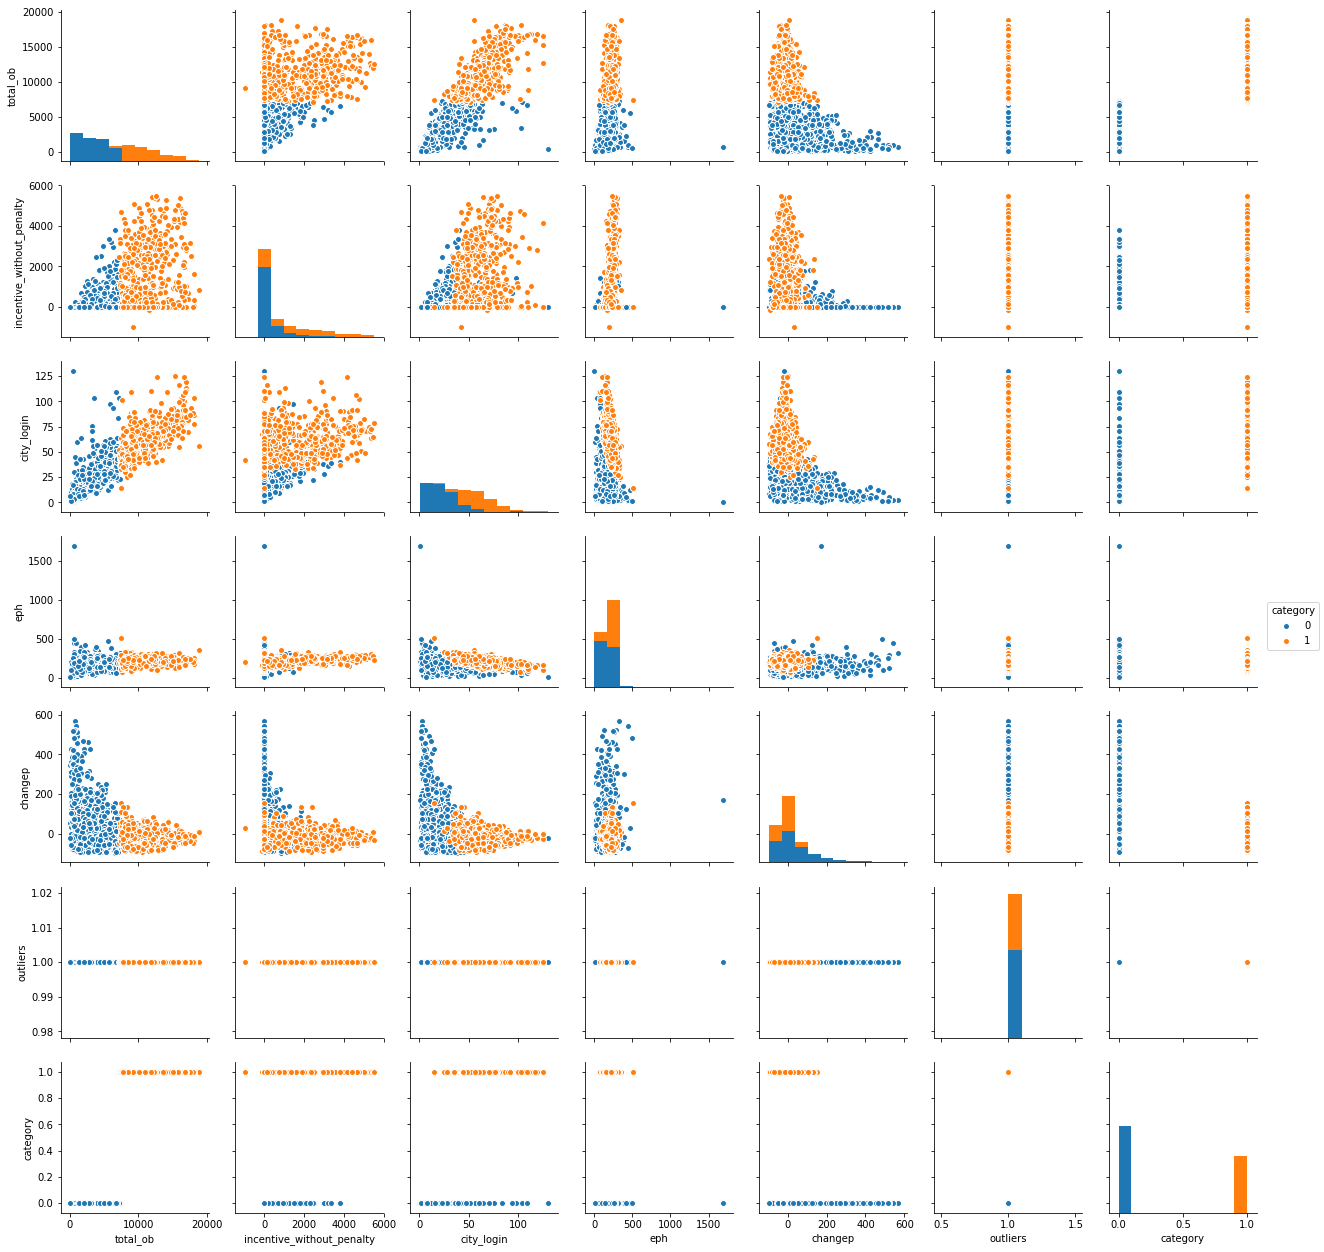

In [124]:
sns.pairplot(wk46_without_outliers,hue="category")

In [129]:
wk46_without_outliers["category"] = wk46_without_outliers["category"].map({0:"OB_based",1:"incentives_based"})

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [131]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()